#Pandas
Pandas 역시 NumPy와 비슷하게, data science 및 data analysis 분야에서 필수적으로 사용되는 파이썬 라이브러리입니다.   
https://lectures.quantecon.org/py/ 의 튜토리얼을 참고하였으며,   
https://youtu.be/iGFdh6_FePU 유튜브 영상 또한 참고하였습니다.

In [3]:
import pandas as pd
import numpy as np

#Introduction
Pandas에서 정의된 가장 중요한 두 데이터타입은 Series와 Dataframe 이라고 합니다.   
Series란, 어떤 변수에 대한 관측을 모아두거나 하는, 자료의 'column' 이라고 생각할 수 있습니다.   
Dataframe은, 관련된 data의 column을 모아 두는 object 입니다.

자세한 내용은 공식 문서를 참고하시면 좋을 것 같습니다.   
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html   
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html   


#Series

In [4]:
s = pd.Series(np.random.randn(4), name='daily returns')
s

0   -2.551820
1    0.036482
2    0.968182
3   -1.431717
Name: daily returns, dtype: float64

인덱스 0, 1, 2, 3이 pd.Series로부터 생성되었고, 각 인덱스에는 NumPy의 random으로 값이 정해졌습니다.   
아래에는 series의 이름이 나타내어져 있으며, 데이터 타입 또한 표시해 줍니다.

In [5]:
s * 100

0   -255.182038
1      3.648183
2     96.818157
3   -143.171672
Name: daily returns, dtype: float64

우리가 array에 하는 것과 비슷하게, series 전체에 특정 값을 곱하는 등의 연산이 가능합니다.

In [6]:
np.abs(s)

0    2.551820
1    0.036482
2    0.968182
3    1.431717
Name: daily returns, dtype: float64

In [7]:
s.describe()

count    4.000000
mean    -0.744718
std      1.557978
min     -2.551820
25%     -1.711743
50%     -0.697617
75%      0.269407
max      0.968182
Name: daily returns, dtype: float64

series만의 메소드 역시 존재합니다.   
describe라는 메소드 (위에서 언급했던 documentation 내에 자세한 내용이 있습니다)는, 해당 series에 대한 구체적인 통계적 값을 보여줍니다.

index의 각 항목들을 단순히 0, 1, 2, 3... 과 같은 숫자뿐만 아니라, 다음과 같이 이름을 변경할 수 있습니다 (re-labeling the index).

In [8]:
s.index = ['AMZN', 'AAPL', 'MSFT', 'GOOG']
s

AMZN   -2.551820
AAPL    0.036482
MSFT    0.968182
GOOG   -1.431717
Name: daily returns, dtype: float64

위와 같이, series는 빠르고 효과적인 Python의 dictionray와 같다고 할 수 있습니다.   
다만 dictionary 내의 모든 데이터 타입이 동일해야 하는 제한 사항이 있습니다. 위의 경우는 float입니다.   
실제로 dictionary와 매우 유사한 방법으로 사용할 수 있습니다.

In [9]:
s['AMZN']

-2.551820381896345

In [10]:
s['AMZN'] = 0
s

AMZN    0.000000
AAPL    0.036482
MSFT    0.968182
GOOG   -1.431717
Name: daily returns, dtype: float64

위처럼 특정 index의 값을 조회할 수도 있고, 값을 재설정할 수도 있습니다.

In [11]:
'AAPL' in s

True

#Dataframe
Series가 하나의 data column이었다면, Dataframe은 각 변수들에 대한 column의 집합이라고 할 수 있습니다.   
Excel의 spreadsheet와 매우 비슷하다고 생각하시면 될 것 같습니다.   
따라서, dataframe은 행과 열 (rows and columns)로 이루어진 방대한 양의 데이터, 특히 각 row와 column에 대한 구체적인 index가 정해진 데이터를 다루고 나타내기에 매우 최적화되어 있는 도구입니다.   
   
예제 사이트에서 제공한 csv 파일을 사용하였습니다.

In [23]:
df = pd.read_csv('https://github.com/QuantEcon/QuantEcon.lectures.code/raw/master/pandas/data/test_pwt.csv')
type(df)

pandas.core.frame.DataFrame

read_csv는 pandas에서 매우 자주 사용하게 될 함수입니다 (역시나 documentation 참고: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html?highlight=read_csv#pandas.read_csv)   


In [15]:
df

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.653,0.999500,2.950722e+05,75.716805,5.578804
1,Australia,AUS,2000,19053.186,1.724830,5.418047e+05,67.759026,6.720098
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954
5,South Africa,ZAF,2000,45064.098,6.939830,2.272424e+05,72.718710,5.726546
6,United States,USA,2000,282171.957,1.000000,9.898700e+06,72.347054,6.032454
7,Uruguay,URY,2000,3219.793,12.099592,2.525596e+04,78.978740,5.108068


csv 파일에서 읽은 data를 구체적으로 출력하였습니다.   
각 column과 row의 index가 나타내져 있고, 이를 바탕으로 각 데이터가 표시되어 있는 점을 눈여겨 보시면 좋을 것 같습니다.


In [16]:
df[2:5]

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954


자주 사용하듯 범위를 지정하는 표기를 dataframe에서도 사용할 수 있습니다.   


In [17]:
df[['country', 'tcgdp']]

,country,tcgdp
0,Argentina,2.950722e+05
1,Australia,5.418047e+05
2,India,1.728144e+06
3,Israel,1.292539e+05
4,Malawi,5.026222e+03
5,South Africa,2.272424e+05
6,United States,9.898700e+06
7,Uruguay,2.525596e+04


원하는 column만 지정해서 출력하는 것도 가능합니다.

iloc은 굉장히 강력한 기능을 제공합니다.   
정수형에 기반한 indexing에 사용됩니다.
   
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html
   
정수형에 기반하지 않은, loc 도 존재합니다.   
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html

In [18]:
df.iloc[2:5, 0:4]

,country,country isocode,year,POP
2,India,IND,2000,1006300.297
3,Israel,ISR,2000,6114.570
4,Malawi,MWI,2000,11801.505


iloc을 이용하여 row 2에서 4까지, column 0에서 3까지를 지정하여 출력하는 모습입니다.

In [24]:
df.loc[df.index[2:5], ['country', 'tcgdp']]

,country,tcgdp
2,India,1.728144e+06
3,Israel,1.292539e+05
4,Malawi,5.026222e+03


loc을 이용하여, 정수와 이름 label로 특정 영역을 가리켜 출력하였습니다.

dataframe 내에서 특정 column만 추출할 수 있습니다.   
위 자료에서, population과 total GDP (tcgdp) 에만 관심이 있다고 해 봅시다.   
특정 index의 이름을 가리켜, 다음과 같이 df를 재정의할 수 있습니다.

In [25]:
df = df[['country','POP','tcgdp']]
df

,country,POP,tcgdp
0,Argentina,37335.653,2.950722e+05
1,Australia,19053.186,5.418047e+05
2,India,1006300.297,1.728144e+06
3,Israel,6114.570,1.292539e+05
4,Malawi,11801.505,5.026222e+03
5,South Africa,45064.098,2.272424e+05
6,United States,282171.957,9.898700e+06
7,Uruguay,3219.793,2.525596e+04


위에서는 자료의 왼쪽에 숫자로 0, 1, 2, 3... 와 같이 순서대로 적혀 있는 것을 볼 수 있습니다.   
하지만 index를 국가 이름으로 지정하는 방법도 있습니다.

In [26]:
df = df.set_index('country')
df

,POP,tcgdp
country,,
Argentina,37335.653,2.950722e+05
Australia,19053.186,5.418047e+05
India,1006300.297,1.728144e+06
Israel,6114.570,1.292539e+05
Malawi,11801.505,5.026222e+03
South Africa,45064.098,2.272424e+05
United States,282171.957,9.898700e+06
Uruguay,3219.793,2.525596e+04


set_index를 이용하여, country를 index로 지정하였습니다.   
   
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_index.html

In [27]:
df.columns = 'population', 'total GDP'
df

,population,total GDP
country,,
Argentina,37335.653,2.950722e+05
Australia,19053.186,5.418047e+05
India,1006300.297,1.728144e+06
Israel,6114.570,1.292539e+05
Malawi,11801.505,5.026222e+03
South Africa,45064.098,2.272424e+05
United States,282171.957,9.898700e+06
Uruguay,3219.793,2.525596e+04


dataframe의 column 명을 새로 지어 주었습니다.   
기존의 csv 파일에서 가져오는 column 명이 마음에 들지 않는 경우, 위처럼 수정할 수 있습니다.   

다음으로는, 위 표에서 인구수의 단위가 천 명이므로, 1000을 곱해 줍니다.

In [28]:
df['population'] = df['population'] * 1e3
df

,population,total GDP
country,,
Argentina,3.733565e+07,2.950722e+05
Australia,1.905319e+07,5.418047e+05
India,1.006300e+09,1.728144e+06
Israel,6.114570e+06,1.292539e+05
Malawi,1.180150e+07,5.026222e+03
South Africa,4.506410e+07,2.272424e+05
United States,2.821720e+08,9.898700e+06
Uruguay,3.219793e+06,2.525596e+04


그 다음, GDP per capita라는 column을 추가해 보도록 하겠습니다.   
이를 위해서는 새로운 column을 만들어야 합니다. 

In [29]:
df['GDP percap'] = df['total GDP'] * 1e6 / df['population']
df

,population,total GDP,GDP percap
country,,,
Argentina,3.733565e+07,2.950722e+05,7903.229085
Australia,1.905319e+07,5.418047e+05,28436.433261
India,1.006300e+09,1.728144e+06,1717.324719
Israel,6.114570e+06,1.292539e+05,21138.672749
Malawi,1.180150e+07,5.026222e+03,425.896679
South Africa,4.506410e+07,2.272424e+05,5042.647686
United States,2.821720e+08,9.898700e+06,35080.381854
Uruguay,3.219793e+06,2.525596e+04,7843.970620


또 다른 pandas의 series와 dataframe의 장점은, Matplotlib을 통해 자료를 그래프화 및 시각화할 수 있다는 점입니다.   
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

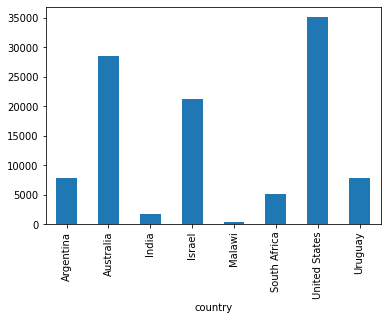

In [31]:
df['GDP percap'].plot(kind='bar')
plt.show()

다음으로, 위 표에서의 자료 순서를 바꿔 봅시다.

In [33]:
df = df.sort_values(by='GDP percap', ascending = False)
df

,population,total GDP,GDP percap
country,,,
United States,2.821720e+08,9.898700e+06,35080.381854
Australia,1.905319e+07,5.418047e+05,28436.433261
Israel,6.114570e+06,1.292539e+05,21138.672749
Argentina,3.733565e+07,2.950722e+05,7903.229085
Uruguay,3.219793e+06,2.525596e+04,7843.970620
South Africa,4.506410e+07,2.272424e+05,5042.647686
India,1.006300e+09,1.728144e+06,1717.324719
Malawi,1.180150e+07,5.026222e+03,425.896679


GDP per capita의 값을, 내림차순으로 (큰 수부터 작은 수 방향으로) 정렬되었음을 확인할 수 있습니다.   
이를 다시 막대그래프로 나타내 봅시다.

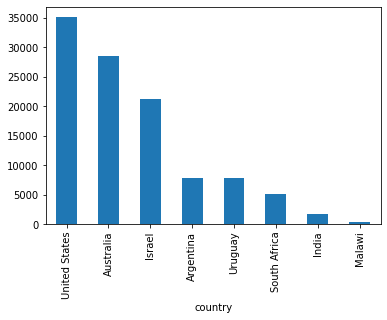

In [34]:
df['GDP percap'].plot(kind='bar')
plt.show()

그래프가 정렬되어 출력되는 것을 확인할 수 있습니다.

#requests 를 이용하여 데이터에 접근하기
Python의 표준 라이브러리를 이용하면, 인터넷에서 데이터를 가져올 수 있습니다.   
   
https://requests.readthedocs.io/en/master/

In [35]:
import requests
r = requests.get('http://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv')

가져온 자료는 미국의 실업률 통계입니다 (US civilian unemplyment rate)

In [36]:
url = 'http://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv'
source = requests.get(url).content.decode().split("\n")

In [37]:
source[0]

'DATE,VALUE\r'

In [38]:
source[1]

'1948-01-01,3.4\r'

In [39]:
source[2]

'1948-02-01,3.8\r'

성공적으로 데이터를 가져온 것을 확인할 수 있으며, 각 인자를 접근할 수 있는 것도 확인하였습니다.   
출력한 것은 날짜 column이네요.   
   
위 자료를 적당히 잘라서 array에 저장할 코드를 작성 할 수도 있지만,   
pandas의 read_csv를 이용하면 이러한 일들을 훨씬 간단하게 처리할 수 있습니다.
'parse_dates=True' 를 사용해 봅시다.

In [40]:
data = pd.read_csv(url, index_col = 0, parse_dates = True)

위처럼 데이터를 가져오고 나면, 앞에서 했듯 pandas를 이용하여 데이터를 원하는 대로 다룰 수 있습니다.

In [41]:
type(data)

pandas.core.frame.DataFrame

pandas의 DataFrame 형식임을 확인할 수 있습니다.

In [42]:
data.head() #자료의 첫 5개 항목을 보여줍니다. dataframe을 잠깐 훑어보기 좋은 방법.

,VALUE
DATE,
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5


In [43]:
pd.set_option('precision', 1)
data.describe()

,VALUE
count,873.0
mean,5.8
std,1.7
min,2.5
25%,4.5
50%,5.6
75%,6.8
max,14.7


아까와 같이 describe를 이용하여 datafrme의 통계를 확인합니다.

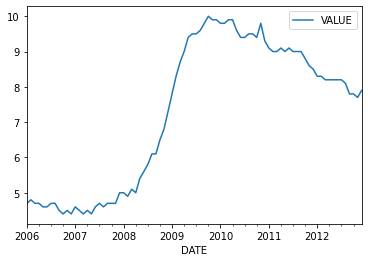

In [44]:
data['2006':'2012'].plot()
plt.show()

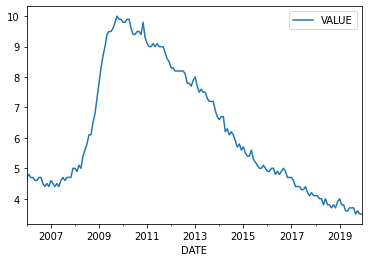

In [45]:
data['2006':'2019'].plot()
plt.show()

자료를 원하는 대로 그래프로 나타낼 수도 있습니다.

이 외에, 데이터셋을 합치는 (merging data sets) 등, pandas로 할 수 있는 더 많은 것들이 있습니다.